# <span style="color:#F72585"><center>Primeros pasos con PyTorch</center></span>

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Pytorch/Imagenes/Pytorch_logo.png" width="400" height="100"/>
</center>
</figure>


Fuente [vector, logo,zone](https://www.vectorlogo.zone/logos/pytorch/index.html)

## <span style="color:#4361EE">Introducción</span>

En esta lección construimos nuestra primera red neuronal con PyTorch. Usamos el famoso ejemplo [fashion mnist](https://www.kaggle.com/zalando-research/fashionmnist). En este caso tomaremos los datos directamente de la librería `torchvision`. Las lecciones introductorias de Pytorch son adapciones de los [tutoriales oficiales de Pytorch](https://pytorch.org/tutorials/).

Antes de construir nuestra primera red neuronal formal, vamos a revisar su breve historia y elementos principales.


## <span style="color:#4361EE">¿Que es Pytorch?</span>

PyTorch es un marco de aprendizaje automático de código abierto basado en la biblioteca Torch, utilizado para aplicaciones como visión por computadora y procesamiento de lenguaje natural, desarrollado principalmente por Meta AI. Es un software gratuito y de código abierto publicado bajo la licencia BSD modificada. Aunque la interfaz de Python está más pulida y es el enfoque principal del desarrollo, PyTorch también tiene una interfaz de C++.

Varias piezas de software de aprendizaje profundo se construyen sobre PyTorch, incluido Tesla Autopilot, Uber 's Pyro, Hugging Face's Transformers, PyTorch Lightning, Catalyst, entre los más importante hasta 2022.

PyTorch proporciona dos características de alto nivel:

* Computación de tensor (como NumPy) con fuerte aceleración a través de unidades de procesamiento de gráficos (GPU)
* Redes neuronales profundas construidas sobre un sistema de diferenciación automática. 

Meta (anteriormente conocido como Facebook) opera PyTorch y Convolutional Architecture for Fast Feature Embedding (Caffe2), pero los modelos definidos por los dos marcos eran mutuamente incompatibles. El proyecto Open Neural Network Exchange (ONNX ) fue creado por Meta y Microsoft en septiembre de 2017 para convertir modelos entre marcos. Caffe2 se fusionó con PyTorch a fines de marzo de 2018.


[Wikipedia](https://en.wikipedia.org/wiki/PyTorch#History).


### <span style="color:#4CC9F0">Tensores PyTorch</span>

PyTorch define una clase llamada Tensor (`torch.Tensor`) para almacenar y operar en matrices rectangulares multidimensionales homogéneas de números. Los tensores PyTorch son similares a los arreglos NumPy, pero también se pueden operar en una GPU `NVIDIA` compatible con `CUDA`. PyTorch también ha estado desarrollando soporte para otras plataformas GPU, por ejemplo, `ROCm de AMD` y `Metal Framework de Apple`. 

PyTorch admite varios subtipos de tensores.

Tenga en cuenta que el término "tensor" aquí no tiene el mismo significado que en matemáticas o física. El significado de la palabra en esas áreas solo está tangencialmente relacionado con el de *aprendizaje de máquina*. En matemáticas, un tensor es un cierto tipo de objeto en álgebra lineal, mientras que en física el término "tensor" generalmente se refiere a lo que los matemáticos llaman campo tensorial.


### <span style="color:#4CC9F0">Módulos de Pytorch</span>

#### Módulo Autograd

PyTorch utiliza un método llamado diferenciación automática. Un objeto (un grafo) registra qué operaciones se han realizado y luego las reproduce hacia atrás para calcular los gradientes. Este método es especialmente poderoso cuando se construyen redes neuronales para ahorrar tiempo en una época al calcular la diferenciación de los parámetros en el paso hacia adelante.

#### Módulo Optim

`torch.optim` es un módulo que implementa varios algoritmos de optimización utilizados para construir redes neuronales. La mayoría de los métodos de uso común ya son compatibles, por lo que no es necesario crearlos desde cero.

#### Módulo nn

El autograd de PyTorch facilita la definición de gráficos computacionales y la toma de gradientes, pero el autograd sin procesar puede tener un nivel demasiado bajo para definir redes neuronales complejas. Aquí es donde el módulo `nn` puede ayudar. El *nn* módulo proporciona capas y herramientas para crear fácilmente redes neuronales simplemente definiendo las capas de la red.


PyTorch también contiene muchos otros submódulos útiles, como utilidades de carga de datos y funciones de entrenamiento distribuidas.


### <span style="color:#4CC9F0">Instalar Pytorch</span>


En consola ejecute el siguiente comando. 

In [13]:
#conda install -c pytorch pytorch

## <span style="color:#4361EE">Trabajando con datos</span>

PyTorch tiene dos primitivas para trabajar con datos: `torch.utils.data.DataLoader` y `torch.utils.data.Dataset`. *Dataset* almacena las muestras y sus etiquetas correspondientes, y *DataLoader* envuelve un iterable alrededor de *Dataset*.

In [14]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose

import matplotlib.pyplot as plt
import numpy as np

from torch.nn import Flatten, Sequential, Linear, ReLU

PyTorch ofrece bibliotecas específicas de dominio como `TorchText`, `TorchVision` y `TorchAudio`, todas las cuales incluyen conjuntos de datos. En esta lección, usaremos un conjunto de datos de `TorchVision`.

El módulo `torchvision.datasets` contiene objetos de conjunto de datos para muchos datos de visión del mundo real como CIFAR, COCO ([lista completa aquí](https://pytorch.org/vision/stable/datasets.html)). En este tutorial, usamos el conjunto de datos FashionMNIST. Cada conjunto de datos de TorchVision incluye dos argumentos: *transform* y *target_transform* para modificar las muestras y las etiquetas respectivamente. 

En el siguiente fragmento de código se leen los datos para entrenamiento y test. Si aún no se han bajado los datos, PyTorch lo hace por esta única ocasión. La próxima vez los leerá de la carpeta interna 'data'. El parámetro *transform* permite convertir los datos a un formato específico. En este caso a tensores de Torch.


In [15]:
# Baja los datos de entrenamiento de open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Baja los datos test data de open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

### <span style="color:#4CC9F0">Una primera imagen de los datos</span>


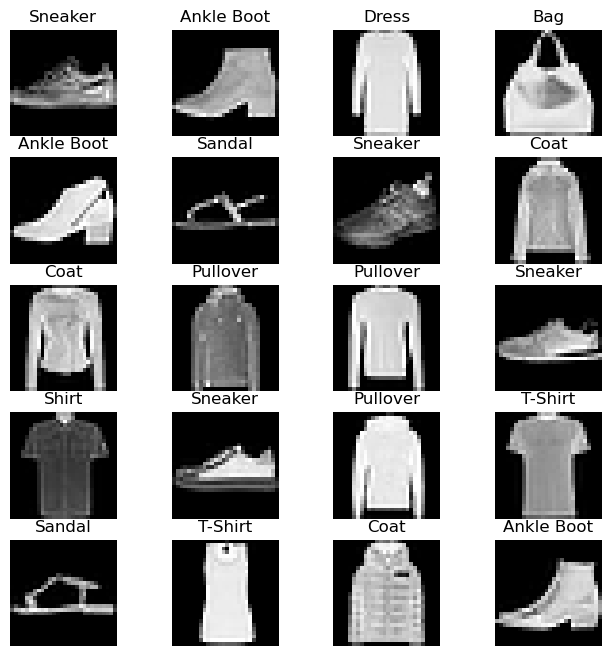

In [16]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(training_data));
    img = training_data[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[training_data[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

### <span style="color:#4CC9F0">Dataloaders</span>

Pasamos el *Dataset* como un parámetro para `DataLoader`
Esto envuelve un iterable sobre nuestro conjunto de datos y admite procesamiento por lotes, muestreo, barajado y carga de datos multiproceso automáticos. Aquí definimos un tamaño de lote de 64, es decir, cada elemento en el cargador de datos iterable devolverá un lote de 64 imágenes con sus etiquetas.

In [17]:
batch_size = 64

#crea data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size, num_workers=4)
test_dataloader = DataLoader(test_data, batch_size=batch_size, num_workers=4)

print(len(train_dataloader.dataset))

for X, y in test_dataloader:
    print('X[N, C, H, W]: ', X.shape)
    print('Shape of y: ', y.shape, y.dtype)
    break

60000
X[N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


## <span style="color:#4361EE">Creando modelos</span>

Para definir una red neuronal en PyTorch, creamos una clase que hereda de nn.Module. Definimos las capas de la red en la función __init__ y especificamos cómo pasarán los datos a través de la red en la función de reenvío. Para acelerar las operaciones en la red neuronal, lo trasladamos a la GPU si está disponible.

El método *forward* implementa el cálculo de la red neuronal. Este método hace el mismo papel del métodos genérico `__call__` que estudiamos en la lección de clases. 

En el ejemplo sucede lo siguiente. 

* Se determina si hay GPU disponible. Si la hay se asigna la primera GPU como dispositivo. Usualmente este dispositivo se denomina en Torch `cuda:0`. Si hau GPU disponible se asigna como dispositivo `cpu`. En el dispositivo alojaremos la instancia de clase.
* Se crea la clase *NeuralNetwork*, derivada de *nn.Module*
* Se instancia un objeto de clase *NeuralNetwork* y se coloca en el dispositivo disponible. El objeto se ha llamado  *modelo*.

Si por ejemplo, a lo largo del código, *x* representa un dato (en nuestro ejemplo una imagen de MnistFashion, y se llama
`modelo(x)`, lo que ocurre es que se ejecuta el método *forward*. es como si escribiera `modelo.forward(x)`.


In [18]:
# Obtiene gpu o cpu device para el entrenamiento
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('using {} device'.format(device))

# define el modelo
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = Flatten()
        self.linear_relu_stack = Sequential(
            Linear(28*28, 512),
            ReLU(),
            Linear(512, 512),
            ReLU(),
            Linear(512, 10),
            ReLU()
        )
        
    # la función forward es la que define la estructura de la red
    # en este ejemplo aceptamos solo una entrada, pero si lo desea,
    # siéntete libre de usar más
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


```{admonition} Nota
:class: note
Cuando se invoca model, automáticamente se ejecuta la función *\_\_call\_\_* de la clase. En Pytorch la clase `nn.Module` de la cual derivamos  nuestra clase llama internamente a la función *forward*, que nosotros debemos sobrecargar (escribir para definir nuestro modelo), como puede verificar [aquí](https://github.com/pytorch/pytorch/blob/472be69a736c0b2aece4883be9f8b18e2f3dfbbd/torch/nn/modules/module.py#L487).
```


## <span style="color:#4361EE">Función de pérdida y optimizador</span>

### <span style="color:#4CC9F0">Función de pérdida y optimizador</span>


In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

### <span style="color:#4CC9F0">Función de entrenamiento</span>

In [20]:
def train(dataloader, model, loss_fn, optimizer): 
    size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Calcula error de predicción
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad() # coloca el gradiente en cero
        loss.backward() # Calcula el gradiente a lo largo de la red de forma aditiva
        optimizer.step() # ejecuta el paso del SDG
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f'loss: {loss:>7f} [{current:5d}/{size:>5d}]')
            

### <span style="color:#4CC9F0">Función de prueba (testeo) del modelo</span>


In [21]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # le indica la modelo que trabajará en modo inferencia (no entrenamiento)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred,y).item()
            correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    

## <span style="color:#4361EE">Entrenamiento y validación</span>

In [22]:
epochs = 5 #Recomendamos correr este cuaderno con 100 epochs
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 1
-------------------------------
loss: 2.302137 [    0/60000]
loss: 2.293269 [ 6400/60000]
loss: 2.286790 [12800/60000]
loss: 2.280539 [19200/60000]
loss: 2.265404 [25600/60000]
loss: 2.261191 [32000/60000]
loss: 2.263472 [38400/60000]
loss: 2.250784 [44800/60000]
loss: 2.250596 [51200/60000]
loss: 2.203350 [57600/60000]
Test Error: 
 Accuracy: 43.0%, Avg loss: 2.215169 

Epoch 2
-------------------------------
loss: 2.236538 [    0/60000]
loss: 2.211922 [ 6400/60000]
loss: 2.195147 [12800/60000]
loss: 2.201983 [19200/60000]
loss: 2.148275 [25600/60000]
loss: 2.129874 [32000/60000]
loss: 2.142871 [38400/60000]
loss: 2.111024 [44800/60000]
loss: 2.152018 [51200/60000]
loss: 2.034351 [57600/60000]
Test Error: 
 Accuracy: 44.0%, Avg loss: 2.073841 

Epoch 3
-------------------------------
loss: 2.118966 [    0/60000]
loss: 2.074672 [ 6400/60000]
loss: 2.044836 [12800/60000]
loss: 2.072174 [19200/60000]
loss: 1.958981 [25600/60000]
loss: 1.929525 [32000/60000]
loss: 1.958399 [38400/

## <span style="color:#4361EE">Guardando y recuperando el modelo</span>


### <span style="color:#4CC9F0">Guardar el modelo</span>


Para guardar el modelo al correr el cuaderno localmente puede ejecutar

````{tab} Python
```python
path = '../Checkpoints/Model_0'
torch.save(model.state_dict(), path)
print(' Modelo Pytorch guardado: ', path)
```
````


### <span style="color:#4CC9F0">Carga el modelo</span>


Para recuperar el modelo al correr el cuaderno localmente puede ejecutar

````{tab} Python
```python
model = NeuralNetwork()
model.load_state_dict(torch.load(path))
```
````


## <span style="color:#4361EE">Predicción</span>

In [24]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
for i in range(20):
    x,y = test_data[i][0], test_data[i][1]
    with torch.no_grad():
        pred = model(x) #model(x.cuda()) para gpu 
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        print(f'Predicted: "{predicted}", Actual: "{actual}"')
        

Predicted: "Ankle boot", Actual: "Ankle boot"
Predicted: "Pullover", Actual: "Pullover"
Predicted: "T-shirt/top", Actual: "Trouser"
Predicted: "T-shirt/top", Actual: "Trouser"
Predicted: "Pullover", Actual: "Shirt"
Predicted: "T-shirt/top", Actual: "Trouser"
Predicted: "Coat", Actual: "Coat"
Predicted: "Coat", Actual: "Shirt"
Predicted: "Sneaker", Actual: "Sandal"
Predicted: "Sneaker", Actual: "Sneaker"
Predicted: "Pullover", Actual: "Coat"
Predicted: "Ankle boot", Actual: "Sandal"
Predicted: "Sneaker", Actual: "Sneaker"
Predicted: "Ankle boot", Actual: "Dress"
Predicted: "Coat", Actual: "Coat"
Predicted: "T-shirt/top", Actual: "Trouser"
Predicted: "Pullover", Actual: "Pullover"
Predicted: "Pullover", Actual: "Coat"
Predicted: "Bag", Actual: "Bag"
Predicted: "T-shirt/top", Actual: "T-shirt/top"


## <span style="color:#4361EE">Referencias</span> 


1. Basado en los [tutoriales de Pytorch](https://pytorch.org/tutorials/)
1. [Deep learning for coders with FastAI and Pytorch](http://library.lol/main/F13E85845AE48D9FD7488FE7630A9FD3)